# APIs y la importancia de estos elementos



Una API (Application Programming interface, Interfaz de Programación de Aplicaciones) es una forma de comunicación entre dos aplicaciones diferentes. Si bien el término se aplica a dos programas cualesquiera, lo usamos para referirnos a la API de un servicio web que proporciona datos.

Para recuperar datos de una API, se realiza una solicitud a un servidor web remoto: `requests`.

Por ejemplo, si desea crear una aplicación que represente los precios de las acciones, usaría la API de Yahoo! Finance para solicitar los precios actuales de las acciones. Otro ejemplo, es posible descargar los datos metereológicos con la API de AEMET (Agencia Estatal de Meteorología)

Las API son útiles donde:
* Los datos cambian rápidamente, p. precios de las acciones.
* No se requiere el conjunto de datos completo, p. los tweets de un usuario.
* Se trata de cálculos repetidos, p. API de Spotify que te dice el género de una canción.

# ¿Qué significa REST?



La mayoría de las API que existen tendrán las funcionalidades `RESTful`, es decir, proporcionan una interfaz **REST** (*Representational State Transfer*).

REST usa comandos HTTP estándar, lo que significa que obtener datos de una API es similar a acceder a una página web.

Por ejemplo, cuando se escribe `www.google.com` en el navegador, su navegador le solicita al servidor `www.google.com` una página web mediante una solicitud `GET` HTTP (protocolo de transferencia de hipertexto). Hacer una solicitud `GET` a una API RESTful en su lugar recupera datos (en lugar de una página web).

De manera similar, mientras el navegador usa `POST` para enviar el contenido de un formulario, las API REST usan `POST` para actualizar los datos.

Las API REST también usan otros comandos HTTP como `PUT`, para crear datos, y `DELETE`, para eliminar datos.

HTTP es un protocolo basado en texto (**la respuesta siempre es texto**) y podría devolver una respuesta en cualquier formato (esto se encuentra normalmente en la documentación de la API), aunque la mayoría de las veces los datos se devuelven en formato JSON.

Como se utilizan para recuperar datos, las solicitudes `GET` son el tipo de solicitud más utilizado.

# La importancia del formato JSON


**JSON** (Notación de objetos de JavaScript) es un formato para enviar datos, que debe ser legible por humanos y fácil de analizar (se deriva de JavaScript pero es independiente del lenguaje de programación).

Es un formato que utiliza pares de **clave-valor** (por ejemplo, diccionarios de Python `{"nombre": "Antonio", "edad": 16}`).

Veamos un ejemplo de JSON más complejo:

```
{
  "squadName": "Super hero squad",
  "homeTown": "Metro City",
  "formed": 2016,
  "secretBase": "Super tower",
  "active": true,
  "members": [
    {
      "name": "Molecule Man",
      "age": 29,
      "secretIdentity": "Dan Jukes",
      "powers": [
        "Radiation resistance",
        "Turning tiny",
        "Radiation blast"
      ]
    },
    {
      "name": "Madame Uppercut",
      "age": 39,
      "secretIdentity": "Jane Wilson",
      "powers": [
        "Million tonne punch",
        "Damage resistance",
        "Superhuman reflexes"
      ]
    },
    {
      "name": "Eternal Flame",
      "age": 1000000,
      "secretIdentity": "Unknown",
      "powers": [
        "Immortality",
        "Heat Immunity",
        "Inferno",
        "Teleportation",
        "Interdimensional travel"
      ]
    }
  ]
}
```

Puede ayudarse de webs para verificar si un objeto JSON está bien formateado y creado: https://jsonformatter.curiousconcept.com/#

# ¿Cómo nos comunicamos con las APIs?



Una vez se envía una solicitud `GET`,  ¿cómo sabemos que se procesó de forma correcta?.

Los servidores emiten **códigos de estado numéricos** en respuesta a solicitudes HTTP que indican si una solicitud se completó con éxito.

Algunos comunes relacionados con las solicitudes `GET` son:

* `200` - Éxito.
* `300` - La API redirige a otro punto de conexión, algo ha cambiado y se está accediendo a un punto que ya no es apto.
* `400` - Petición errónea.
* `401` - No se ha autenticado correctamente.
* `403` - Prohibido.
* `404` - No encontrado.
* `429` - Se han realizado demasiadas solicitudes.

# Ejemplo de API: Eurostat

Profundicemos mirando una API que puede sernos útil, la [API de EUROSTAT](https://ec.europa.eu/eurostat/web/json-and-unicode-web-services).

Navegue a la web y vea qué tipo de información podemos obtener de ella

Veamos un ejemplo de petición y su significado por partes:

Ejemplo de petición: "http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/nama_10_gdp?precision=1&unit=CLV05_MEUR".


Lo primero que tenemos que identificar son las partes **fijas y dinámicas** de la petición:

- Parte URL **fija**: "http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/"
- Parte **dinámica** de la URL que cambia por cada petición: "json/en/nama_10_gdp?precision=1&unit=CLV05_MEUR"

Por otro lado, analizaremos qué significa cada campo de la petición:

* "http://ec.europa.eu/eurostat/wdds/": Es la URL, parte fija de la solicitud relacionada con la API.
* "/rest/data/" : Corresponde al servicio que vamos a consultar.
* "/v2.1/" : Versión del servicio de la API que estamos usando.
* "/json/" : Formato de datos a devolver (json o unicode)
* "/en/" : Idioma utilizado para los metadatos (disponibles: en/fr/de)
* /nama_10_gdp/ : Identificador de código único del conjunto de datos consultado.
* /?precision=1&unit=CLV05_MEUR/: Precisión: el número de decimales para los valores devueltos por la petición. Unit : filtro en la dimensión UNIT del conjunto de datos.

Veamos un ejemplo:

In [4]:
%pip install requests

     -------------------------------------- 62.8/62.8 KB 420.9 kB/s eta 0:00:00
     ------------------------------------ 139.0/139.0 KB 919.6 kB/s eta 0:00:00
     ------------------------------------ 160.2/160.2 KB 961.6 kB/s eta 0:00:00
     -------------------------------------- 61.2/61.2 KB 141.8 kB/s eta 0:00:00


You should consider upgrading via the 'c:\Users\Outlo\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\Users\Outlo\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



  Using cached requests-2.28.0-py3-none-any.whl (62 kB)
  Using cached charset_normalizer-2.0.12-py3-none-any.whl (39 kB)
  Using cached certifi-2022.6.15-py3-none-any.whl (160 kB)


In [5]:
# Importamos la librería request para hacer las peticiones.
import requests


# URL de la consulta
url = ('http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en'
       '/nama_10_gdp?precision=1'
       '&unit=CLV05_MEUR'  # Unidades: CLV (2005) Million EUR
       '&geo=NL&geo=DE'  # País: Holanda y Alemania
       '&time=2010&time=2011&time=2012'  # Años: 2010, 2011 y 2012
       '&na_item=B1GQ&na_item=D21'  # GDP (precio de mercados) e impuestos
       )

# Vemos como se queda la URL
print(url)

http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/nama_10_gdp?precision=1&unit=CLV05_MEUR&geo=NL&geo=DE&time=2010&time=2011&time=2012&na_item=B1GQ&na_item=D21


In [6]:
# Realización de la petición GET
respuesta = requests.get(url)  

# Imprimimos el código de estado en la respuesta (response)
print(f"Request {respuesta.status_code} : '{respuesta.reason}'")

Request 200 : 'OK'


In [7]:
# Obtenemos los datos y los convertimos a JSON.
datos = respuesta.json()  
# Imprimmos los datos que hemos convertidos a JSON.
# Podríamos usar print(respuesta.json()) pero no se imprime de una manera correcta.
# Nos ayudamos de la librería pprint
import pprint
pp = pprint.PrettyPrinter(indent=1)
pp.pprint(datos)

{'class': 'dataset',
 'dimension': {'geo': {'category': {'index': {'DE': 0, 'NL': 1},
                                    'label': {'DE': 'Germany (until 1990 '
                                                    'former territory of the '
                                                    'FRG)',
                                              'NL': 'Netherlands'}},
                       'label': 'geo'},
               'na_item': {'category': {'index': {'B1GQ': 0, 'D21': 1},
                                        'label': {'B1GQ': 'Gross domestic '
                                                          'product at market '
                                                          'prices',
                                                  'D21': 'Taxes on products'}},
                           'label': 'na_item'},
               'time': {'category': {'index': {'2010': 0, '2011': 1, '2012': 2},
                                     'label': {'2010': '2010',
                        

In [8]:
# Vamos a ver el contenido de los datos
datos

{'version': '2.0',
 'label': 'GDP and main components (output, expenditure and income)',
 'href': 'http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/nama_10_gdp?precision=1&unit=CLV05_MEUR&geo=NL&geo=DE&time=2010&time=2011&time=2012&na_item=B1GQ&na_item=D21',
 'source': 'Eurostat',
 'updated': '2022-06-09',
 'extension': {'datasetId': 'nama_10_gdp',
  'lang': 'EN',
  'description': None,
  'subTitle': None},
 'class': 'dataset',
 'value': {'0': 2426563.7,
  '1': 2521811.0,
  '2': 2532364.7,
  '3': 589946.6,
  '4': 599097.8,
  '5': 592925.0,
  '6': 228301.5,
  '7': 237271.4,
  '8': 236319.0,
  '9': 60631.6,
  '10': 59852.5,
  '11': 57924.1},
 'dimension': {'unit': {'label': 'unit',
   'category': {'index': {'CLV05_MEUR': 0},
    'label': {'CLV05_MEUR': 'Chain linked volumes (2005), million euro'}}},
  'na_item': {'label': 'na_item',
   'category': {'index': {'B1GQ': 0, 'D21': 1},
    'label': {'B1GQ': 'Gross domestic product at market prices',
     'D21': 'Taxes on products'}}},


In [9]:
# Si consultamos la parte de 'value' vemos que no son muy representativos:
datos['value'] 

{'0': 2426563.7,
 '1': 2521811.0,
 '2': 2532364.7,
 '3': 589946.6,
 '4': 599097.8,
 '5': 592925.0,
 '6': 228301.5,
 '7': 237271.4,
 '8': 236319.0,
 '9': 60631.6,
 '10': 59852.5,
 '11': 57924.1}

In [10]:
# Vamos a juntar 'value' y 'id' en una lsita con la función zip().
list(zip(datos['id'], datos['size']))

[('unit', 1), ('na_item', 2), ('geo', 2), ('time', 3)]

In [11]:
# si consultamos 'dimension' vemos más datos
datos['dimension']

{'unit': {'label': 'unit',
  'category': {'index': {'CLV05_MEUR': 0},
   'label': {'CLV05_MEUR': 'Chain linked volumes (2005), million euro'}}},
 'na_item': {'label': 'na_item',
  'category': {'index': {'B1GQ': 0, 'D21': 1},
   'label': {'B1GQ': 'Gross domestic product at market prices',
    'D21': 'Taxes on products'}}},
 'geo': {'label': 'geo',
  'category': {'index': {'DE': 0, 'NL': 1},
   'label': {'DE': 'Germany (until 1990 former territory of the FRG)',
    'NL': 'Netherlands'}}},
 'time': {'label': 'time',
  'category': {'index': {'2010': 0, '2011': 1, '2012': 2},
   'label': {'2010': '2010', '2011': '2011', '2012': '2012'}}}}

In [12]:
# Queremos extraer los índices de cada dimensión de los datos 
#  (por ejemplo, 'DE' y 'NL' para 'geo') y enumerar todas las posibles 
#  combinaciones de índices para construir el índice para los valores en `payload['value'] `.

# Primero extraigamos los índices...

lista_de_claves = []
for i in datos['id']:
    lista_de_claves.append(
        datos['dimension'][i]['category']['index'].keys())
print(lista_de_claves)

[dict_keys(['CLV05_MEUR']), dict_keys(['B1GQ', 'D21']), dict_keys(['DE', 'NL']), dict_keys(['2010', '2011', '2012'])]


In [13]:
# Ahora queremos enumerar todas las combinaciones.
# Afortunadamente, Pandas tiene una función `pd.MultiIndex.from_product` que 
# hará esto por nosotros y nos permite (opcionalmente) nombrar cada una de las 
# dimensiones pasando un argumento `names=`.
import pandas as pd
indices = pd.MultiIndex.from_product(lista_de_claves, names=datos['id'])
indices

MultiIndex([('CLV05_MEUR', 'B1GQ', 'DE', '2010'),
            ('CLV05_MEUR', 'B1GQ', 'DE', '2011'),
            ('CLV05_MEUR', 'B1GQ', 'DE', '2012'),
            ('CLV05_MEUR', 'B1GQ', 'NL', '2010'),
            ('CLV05_MEUR', 'B1GQ', 'NL', '2011'),
            ('CLV05_MEUR', 'B1GQ', 'NL', '2012'),
            ('CLV05_MEUR',  'D21', 'DE', '2010'),
            ('CLV05_MEUR',  'D21', 'DE', '2011'),
            ('CLV05_MEUR',  'D21', 'DE', '2012'),
            ('CLV05_MEUR',  'D21', 'NL', '2010'),
            ('CLV05_MEUR',  'D21', 'NL', '2011'),
            ('CLV05_MEUR',  'D21', 'NL', '2012')],
           names=['unit', 'na_item', 'geo', 'time'])

In [14]:
# Ahora que nuestro índice está construido, podemos pasar una 
# lista de valores, índice y columnas a `pd.DataFrame`.
dataframe_datos = pd.DataFrame(datos['value'].values(), index=indices, columns=['value'])
dataframe_datos


value
unit       na_item geo time           
CLV05_MEUR B1GQ    DE  2010  2426563.7
                       2011  2521811.0
                       2012  2532364.7
                   NL  2010   589946.6
                       2011   599097.8
                       2012   592925.0
           D21     DE  2010   228301.5
                       2011   237271.4
                       2012   236319.0
                   NL  2010    60631.6
                       2011    59852.5
                       2012    57924.1

In [15]:
# Podemos calcular las medias (a lo largo de los años) para cada país 
# y cada `na_item` usando `.groupby(...)` en un DataFrame.

# `groupby` simplemente agrupa un marco de datos sobre los índices/columnas 
# que se les pasan, en los que luego podemos aplicar una función de agregación 
# como la media: `.mean()`

dataframe_datos_media = (dataframe_datos.groupby(['na_item', 'geo']).mean())
dataframe_datos_media

value
na_item geo              
B1GQ    DE   2.493580e+06
        NL   5.939898e+05
D21     DE   2.339640e+05
        NL   5.946940e+04

In [25]:
dataframe_datos_media = (dataframe_datos.groupby(['na_item', 'geo', 'time']).mean())
dataframe_datos_media

value
na_item geo time           
B1GQ    DE  2010  2426563.7
            2011  2521811.0
            2012  2532364.7
        NL  2010   589946.6
            2011   599097.8
            2012   592925.0
D21     DE  2010   228301.5
            2011   237271.4
            2012   236319.0
        NL  2010    60631.6
            2011    59852.5
            2012    57924.1

In [16]:
# Debemos tener en cuenta que tenemos varias claves para poder acceder a los datos.
# Esto quiere decir que para acceder a los datos no podemos hacerlo por: dataframe_datos_media['D21']
# Si que podemos a través de: dataframe_datos_media['value']['D21'].
# Para simplificar los índices y el acceso a los datos vamos a realizar 'unstack'
dataframe_datos.unstack('na_item')


value          
na_item                   B1GQ       D21
unit       geo time                     
CLV05_MEUR DE  2010  2426563.7  228301.5
               2011  2521811.0  237271.4
               2012  2532364.7  236319.0
           NL  2010   589946.6   60631.6
               2011   599097.8   59852.5
               2012   592925.0   57924.1

In [17]:
# Seguimos desagrupando:
(dataframe_datos.unstack('na_item').stack('na_item'))

value
unit       geo time na_item           
CLV05_MEUR DE  2010 B1GQ     2426563.7
                    D21       228301.5
               2011 B1GQ     2521811.0
                    D21       237271.4
               2012 B1GQ     2532364.7
                    D21       236319.0
           NL  2010 B1GQ      589946.6
                    D21        60631.6
               2011 B1GQ      599097.8
                    D21        59852.5
               2012 B1GQ      592925.0
                    D21        57924.1

In [ ]:

%pip install matplotlib
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='time'>

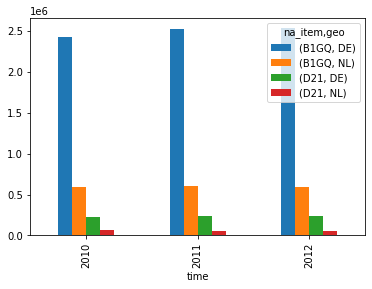

In [24]:
(dataframe_datos
 .unstack(['na_item', 'geo'])  # Deshacemos las agrupaciones
 .droplevel('unit', axis=0)  # Eliminamos todo lo que esté repetido en 'unit' lo eliminamos.
 .droplevel(0, axis=1)  # OR: ['value']
 .plot(kind='bar')  # Realizamos una pequeña gráfica
 )

# Autentificación en las APIs

No todas las API están abiertas para uso inmediato como la que acabamos de ver. Algunas requieren que se pague por el acceso (por ejemplo, la API de Google Maps) y otras requieren que nos registremos primero para acceder.

En ambas situaciones anteriores, es decir, cuando accedamos a una API cerrada, se nos proporcionará una clave. Una clave es una larga cadena de letras y números, que es exclusiva para nosotros y que debe proporcionarse en cada petición a la API. Es decir, se tiene que añadir por cada petición `GET` o `POST` que realice a la API. 

Gracias a este proceso, la API sabe quién realiza la petición y decide cómo tratar su solicitud, ver si tenemos acceso a los datos, etc.

Existen varios tipos diferentes de autenticación (siempre debemos leer la documentación específicos de la API), pero la forma más común es:

```
api_key = 'akjsghdkas8u98324wdfszfsdf3'
respuesta = requests.get(url, auth=(api_key, ''))
```



# Ejercicio de ampliación:
* Obtenga los datos para el conjunto de datos `rd_e_berdindr2` de la API de Eurostat para todas las actividades de **NACE** como porcentaje del PIB.

* Lea los datos usando Pandas.
* Calcule el gasto total en todos los países cada año.
* Dibújelo plotearlo.

## Enlaces de ampliación

[Creador de consultas](https://ec.europa.eu/eurostat/web/json-and-unicode-web-services/getting-started/query-builder)


[Explorador de datos](https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=rd_e_berdindr2&lang=en)


[Metadatos](https://ec.europa.eu/eurostat/cache/metadata/en/rd_esms.htm)

<AxesSubplot:xlabel='time'>

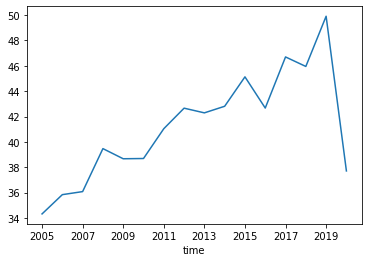

In [53]:
url = ('http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en'
       '/rd_e_berdindr2?precision=1&unit=PC_GDP&nace_r2=TOTAL')
respuesta = requests.get(url)
datos = respuesta.json()

indices = pd.MultiIndex.from_product(
    [datos['dimension'][i]['category']['index'] for i in datos['id']]
    , names = datos['id']
)
indices
tam_indices = len(indices)
def return_none():
    return None

datos_diccionario = defaultdict(return_none, datos['value'])
valores = [datos_diccionario[str(i)] for i in range(tam_indices)]
dataframe_dat = pd.DataFrame(valores, index=indices)
dataframe_dat.unstack('time').droplevel(0, axis=1).sum().plot()



### Solución

<AxesSubplot:xlabel='time'>

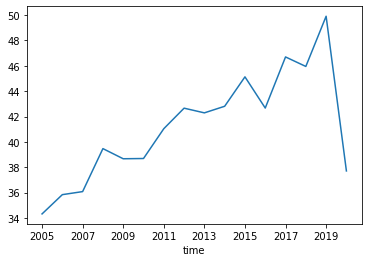

In [26]:
from collections import defaultdict
import requests
import pandas as pd

# Realizar la petición
url = ('http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en'
       '/rd_e_berdindr2?precision=1&unit=PC_GDP&nace_r2=TOTAL')
try:
    respuesta = requests.get(url)
    respuesta.raise_for_status()  # Devuelve un error en caso de error
except:
    print(respuesta.reason)
    raise

# Cambiamos el formato a JSON
datos = respuesta.json()

# Definimos el índices a `datos['dimension']`
indices = pd.MultiIndex.from_product(
    [datos['dimension'][i]['category']['index'] for i in datos['id']]
    , names = datos['id']
)
indices

# Rellenamos los huecos sin datos en los indices
tam_indices = len(indices)

# Definimos una función para usarla en las siguientes líneas
def return_none():
    return None

datos_diccionario = defaultdict(return_none, datos['value'])
valores = [datos_diccionario[str(i)] for i in range(tam_indices)]

# Lectura, manipulación y gráfica
(pd.DataFrame(valores, index=indices)
    # Quitamos el índice creado anterioprmente
   .unstack('time')
   .droplevel(0, axis=1)
    # Obtener totales
   .sum()
    # Dibujar
   .plot()
)

# Otros ejemplos


## API con Registro - Registro de empresas en Reino Unido

Registro de la API: https://developer.companieshouse.gov.uk/developer/signin

```
api_key = 'colocar_la_clave_de_la_api'

url = 'https://api.companieshouse.gov.uk/search?q=consultio consultius'
peticion = requests.get(url, auth=(api_key, ''))
peticion.raise_for_status()

# Obtener el primer item
peticion.json()['items'][0]
```



In [9]:
import requests

## Obtener comunidades de REDDIT

URL de la API: https://www.reddit.com/dev/api/#GET_subreddits_search

Vamos a buscar algunas comunidades de "fotografía"


In [27]:
url = 'https://www.reddit.com/subreddits/search.json?q="fotografia"&limit=5'
respuesta = requests.get(url, headers={'User-agent': 'your bot 0.1'})
respuesta.raise_for_status()

[result['data']['display_name_prefixed']
for result in respuesta.json()['data']['children']]

['r/Fotografia', 'r/brasil', 'r/portugal', 'r/Romania', 'r/italy']

In [10]:
def buscar_en_reddit(comunidad: str, limite: int):
    url = 'https://www.reddit.com/subreddits/search.json?q="{}"&limit={}'.format(comunidad, limite)
    peticion =  requests.get(url, headers={'User-agent': 'your bot 0.1'})
    peticion.raise_for_status()
    return peticion.json()

In [11]:
peticion_1 = buscar_en_reddit('fotografia', 5)

In [12]:
subreddit = 'python'
limit = 10
timeframe = 'month' #hour, day, week, month, year, all
listing = 'top' # controversial, best, hot, new, random, rising, top
 
def get_reddit(subreddit,listing,limit,timeframe):
    try:
        base_url = f'https://www.reddit.com/r/{subreddit}/{listing}.json?limit={limit}&t={timeframe}'
        request = requests.get(base_url, headers = {'User-agent': 'yourbot'})
    except:
        print('An Error Occured')
    return request.json()
 
r = get_reddit(subreddit,listing,limit,timeframe)

In [ ]:
for k in r['data']['children'][0]['data'].keys():
    print(k)

In [ ]:
extraer = ['title','url','score']
 
for i in extraer:
 print(f"{e}: {r['data']['children'][0]['data'][e]}")

In [14]:
subreddit = 'python'
limit = 5
timeframe = 'month' #hour, day, week, month, year, all
listing = 'top' # controversial, best, hot, new, random, rising, top

def get_reddit(subreddit,listing,limit,timeframe):
    try:
        base_url = f'https://www.reddit.com/r/{subreddit}/{listing}.json?limit={limit}&t={timeframe}'
        request = requests.get(base_url, headers = {'User-agent': 'yourbot'})
    except:
        print('An Error Occured')
        
    return request.json()['data']['children']

r = get_reddit(subreddit,listing,limit,timeframe)

In [15]:
hola = {}

nombres = []
titulos = []
upvotes = []
ups_2 = []
total_awards = []

for i, element in enumerate(r):
    
    nombre = element['data']['author_fullname']
    titulo = element['data']['title']
    upvote_ratio = element['data']['upvote_ratio']
    ups = element['data']['ups']
    total_award = element['data']['total_awards_received']
    
    nombres.append(nombre)
    titulos.append(titulo)
    upvotes.append(upvote_ratio)
    ups_2.append(ups)
    total_awards.append(total_award)
    
hola['author_fullname'] = nombres,
hola['title'] = titulos,
hola['upvote_ratio'] = upvotes,
hola['ups'] = ups_2,
hola['total_awards_received'] = total_awards


In [18]:
hola = {}

nombres = []
titulos = []
upvotes = []
ups_2 = []
total_awards = []

for element in r:
    nombres.append(element['data']['author_fullname'])
    titulos.append(element['data']['title'])
    upvotes.append(element['data']['upvote_ratio'])
    ups_2.append(element['data']['ups'])
    total_awards.append(element['data']['total_awards_received'])
    
hola = {
    'author_fullname': nombres,
    'title': titulos,
    'upvote_ratio': upvotes,
    'ups': ups_2,
    'total_awards_received': total_awards
}

In [53]:
import pandas as pd

Acceso API RyM


In [69]:

url = ('https://rickandmortyapi.com/api/character')
respuesta = requests.get(url)
datos = respuesta.json()
datos

{'info': {'count': 826,
  'pages': 42,
  'next': 'https://rickandmortyapi.com/api/character?page=2',
  'prev': None},
 'results': [{'id': 1,
   'name': 'Rick Sanchez',
   'status': 'Alive',
   'species': 'Human',
   'type': '',
   'gender': 'Male',
   'origin': {'name': 'Earth (C-137)',
    'url': 'https://rickandmortyapi.com/api/location/1'},
   'location': {'name': 'Citadel of Ricks',
    'url': 'https://rickandmortyapi.com/api/location/3'},
   'image': 'https://rickandmortyapi.com/api/character/avatar/1.jpeg',
   'episode': ['https://rickandmortyapi.com/api/episode/1',
    'https://rickandmortyapi.com/api/episode/2',
    'https://rickandmortyapi.com/api/episode/3',
    'https://rickandmortyapi.com/api/episode/4',
    'https://rickandmortyapi.com/api/episode/5',
    'https://rickandmortyapi.com/api/episode/6',
    'https://rickandmortyapi.com/api/episode/7',
    'https://rickandmortyapi.com/api/episode/8',
    'https://rickandmortyapi.com/api/episode/9',
    'https://rickandmortyapi.

In [70]:

elementos = [
    ['name'],
    ['status'],
    ['especies'],
    ['gender'],
    ['episode']  
]

nombre=[]
estado=[]
especies=[]
género=[]
episodio=[]

for elem in datos['results']:
    
    elementos = [
    'name',
    'status',
    'species',
    'gender',
    'episode'
 ]
    
    
    nombre.append(elem['name'])
    estado.append(elem['status'])
    especies.append(elem['species'])
    género.append(elem['gender'])
    episodio.append(len(elem['episode']))
    
    datos = {
    'name':nombre,
    'status':estado,
    'species':especies,
    'gender':género,
    'episode':episodio  
     }  
    


datos


{'name': ['Rick Sanchez',
  'Morty Smith',
  'Summer Smith',
  'Beth Smith',
  'Jerry Smith',
  'Abadango Cluster Princess',
  'Abradolf Lincler',
  'Adjudicator Rick',
  'Agency Director',
  'Alan Rails',
  'Albert Einstein',
  'Alexander',
  'Alien Googah',
  'Alien Morty',
  'Alien Rick',
  'Amish Cyborg',
  'Annie',
  'Antenna Morty',
  'Antenna Rick',
  'Ants in my Eyes Johnson'],
 'status': ['Alive',
  'Alive',
  'Alive',
  'Alive',
  'Alive',
  'Alive',
  'unknown',
  'Dead',
  'Dead',
  'Dead',
  'Dead',
  'Dead',
  'unknown',
  'unknown',
  'unknown',
  'Dead',
  'Alive',
  'Alive',
  'unknown',
  'unknown'],
 'species': ['Human',
  'Human',
  'Human',
  'Human',
  'Human',
  'Alien',
  'Human',
  'Human',
  'Human',
  'Human',
  'Human',
  'Human',
  'Alien',
  'Alien',
  'Alien',
  'Alien',
  'Human',
  'Human',
  'Human',
  'Human'],
 'gender': ['Male',
  'Male',
  'Female',
  'Female',
  'Male',
  'Female',
  'Male',
  'Male',
  'Male',
  'Male',
  'Male',
  'Male',
  'unk

In [71]:
pd.DataFrame(datos)


,name,status,species,gender,episode
0,Rick Sanchez,Alive,Human,Male,51
1,Morty Smith,Alive,Human,Male,51
2,Summer Smith,Alive,Human,Female,42
3,Beth Smith,Alive,Human,Female,42
4,Jerry Smith,Alive,Human,Male,39
5,Abadango Cluster Princess,Alive,Alien,Female,1
6,Abradolf Lincler,unknown,Human,Male,2
7,Adjudicator Rick,Dead,Human,Male,1
8,Agency Director,Dead,Human,Male,1
9,Alan Rails,Dead,Human,Male,1


In [82]:
%pip install tqdm
from tqdm import tqdm


     -------------------------------------- 78.4/78.4 kB 364.7 kB/s eta 0:00:00


In [83]:
def ALL_characters():

    df_all = pd.DataFrame()

    url_characters = "https://rickandmortyapi.com/api" + "/character/"

    for i in tqdm(range(42)):

        get_characters = requests.get(url_characters)

        get_characters_json = get_characters.json()

        get_characters_df = pd.DataFrame(get_characters_json['results'])

        url_characters = get_characters_json["info"]["next"]

        df_all = pd.concat([df_all, get_characters_df], axis = 0).reset_index(drop = True)

    return df_all

In [84]:
datos = ALL_characters()

100%|██████████| 42/42 [00:17<00:00,  2.43it/s]


In [85]:
datos

,id,name,status,species,type,gender,origin,location,image,episode,url,created
0,1,Rick Sanchez,Alive,Human,,Male,"{'name': 'Earth (C-137)', 'url': 'https://rick...","{'name': 'Citadel of Ricks', 'url': 'https://r...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/1,2017-11-04T18:48:46.250Z
1,2,Morty Smith,Alive,Human,,Male,"{'name': 'unknown', 'url': ''}","{'name': 'Citadel of Ricks', 'url': 'https://r...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/2,2017-11-04T18:50:21.651Z
2,3,Summer Smith,Alive,Human,,Female,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/3,2017-11-04T19:09:56.428Z
3,4,Beth Smith,Alive,Human,,Female,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/4,2017-11-04T19:22:43.665Z
4,5,Jerry Smith,Alive,Human,,Male,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/5,2017-11-04T19:26:56.301Z
...,...,...,...,...,...,...,...,...,...,...,...,...
821,822,Young Jerry,unknown,Human,,Male,"{'name': 'Earth (Unknown dimension)', 'url': '...","{'name': 'Earth (Unknown dimension)', 'url': '...",https://rickandmortyapi.com/api/character/avat...,[https://rickandmortyapi.com/api/episode/51],https://rickandmortyapi.com/api/character/822,2021-11-02T17:18:31.934Z
822,823,Young Beth,unknown,Human,,Female,"{'name': 'Earth (Unknown dimension)', 'url': '...","{'name': 'Earth (Unknown dimension)', 'url': '...",https://rickandmortyapi.com/api/character/avat...,[https://rickandmortyapi.com/api/episode/51],https://rickandmortyapi.com/api/character/823,2021-11-02T17:19:00.951Z
823,824,Young Beth,unknown,Human,,Female,"{'name': 'Earth (Unknown dimension)', 'url': '...","{'name': 'Earth (Unknown dimension)', 'url': '...",https://rickandmortyapi.com/api/character/avat...,[https://rickandmortyapi.com/api/episode/51],https://rickandmortyapi.com/api/character/824,2021-11-02T17:19:47.957Z
824,825,Young Jerry,unknown,Human,,Male,"{'name': 'Earth (Unknown dimension)', 'url': '...","{'name': 'Earth (Unknown dimension)', 'url': '...",https://rickandmortyapi.com/api/character/avat...,[https://rickandmortyapi.com/api/episode/51],https://rickandmortyapi.com/api/character/825,2021-11-02T17:20:14.305Z


# Recursos y listado de APIs:

https://github.com/public-apis/public-apis

Tome alguna API e intente leer la documentación y trabajar con ellas.

Tenga en cuenta la columna de `Auth` y si necesita registrarse o no.

La columna `HTTPS` indica que a la hora de realizar la petición debemos colocar `https://...` en vez de `http://...`



In [28]:
# Ejemplo con la siguiente API:
# https://kinduff.github.io/dog-api/

url = ('http://dog-api.kinduff.com/api/facts?number=5')
respuesta = requests.get(url)
# Cambiamos el formato a JSON
datos = respuesta.json()

datos['facts']

['Humans can detect sounds at 20,000 times per second, while dogs can sense frequencies of 30,000 times per second.',
 'Teddy Roosevelt’s dog, Pete, ripped a French ambassador’s pants off at the White House.',
 "A dog's average body temperature is 101.2 degrees.",
 'A bloodhound named Tigger holds the record for the longest ears, each measuring more than 13 inches.',
 'Dogs have a ligament in the neck which allows them to conserve energy while running long distances following scent trails with their nose to the ground. Many other species have a similar ligament and it is called a Paddywhack.']